In [144]:
# Dependencies
import pandas as pd
csv_data = "survey_results_public.csv"
df = pd.read_csv(csv_data, encoding="utf-8")
print(df.shape)

(98855, 43)


C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


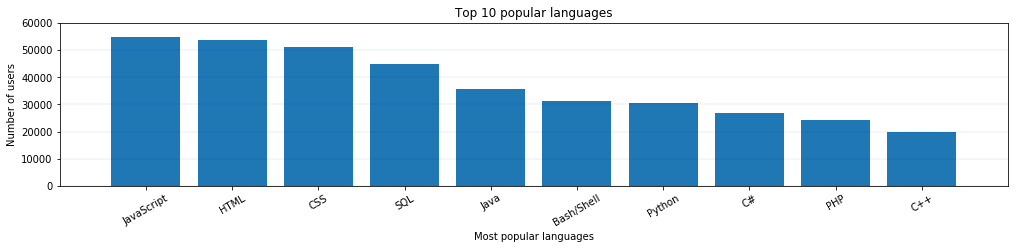

['JavaScript',
 'HTML',
 'CSS',
 'SQL',
 'Java',
 'Bash/Shell',
 'Python',
 'C#',
 'PHP',
 'C++']

In [227]:
from collections import defaultdict
import operator
import matplotlib.pyplot as plt

lang_dict = {}
for i in lang:
    ind_lang = i.split(';')
    #print(ind_lang)
    for k in ind_lang:
        lang_dict[k] = lang_dict.get(k, 0) + 1

s_lang_dict = sorted(lang_dict.items(), key=operator.itemgetter(1), reverse=True)
# sorted_names = sorted(lang_dict, key=lambda x: lang_dict[x])
# sorted_names
x_axis = [i[0] for i in s_lang_dict]
y_axis = [i[1] for i in s_lang_dict]
x_axis = x_axis[:10]
top_lang = x_axis
y_axis = y_axis[:10]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(17,3))
ax.bar(x_axis, y_axis)
ax.set_xlim(-1, 10)
ax.set_ylim(0, 60000)
ax.set_xlabel('Most popular languages')
ax.set_ylabel('Number of users')
ax.set_title('Top 10 popular languages')
ax.set_xticklabels(x_axis, rotation=30)
ax.yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)
plt.show()
top_lang

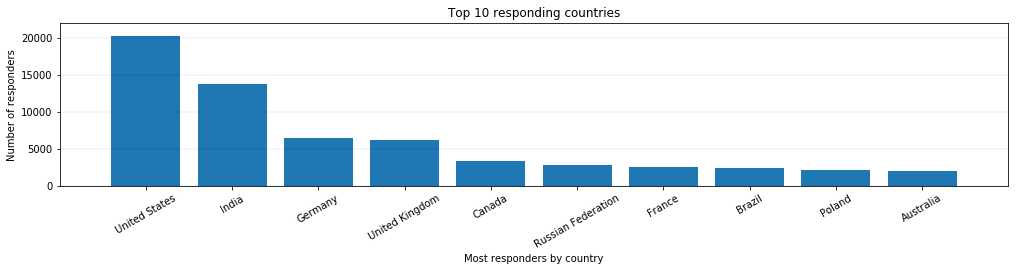

In [234]:
top_countries_df = df['Country'].value_counts().nlargest(10)
x_axis = top_countries_df.index.tolist()
top_countries = x_axis
y_axis = top_countries_df.tolist()
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(17,3))
ax.bar(x_axis, y_axis)
ax.set_xlim(-1, 10)
ax.set_ylim(0, 22000)
ax.set_xlabel('Most responders by country')
ax.set_ylabel('Number of responders')
ax.set_title('Top 10 responding countries')
ax.set_xticklabels(x_axis, rotation=30)
ax.yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)
plt.show()

In [235]:
print(df.shape)
# lang = df['LanguageWorkedWith'].dropna()
# lang.head()

(98855, 43)


### Countrywise languages

In [259]:
df.head()
df.columns
cols = ['Country', 'ConvertedSalary', 'CareerSatisfaction', 'LanguageWorkedWith',
        'DatabaseWorkedWith', 'PlatformWorkedWith', 'FrameworkWorkedWith', 'OperatingSystem',
        'EducationParents', 'Age']

# Generate a sorted list of top 10 countries
sel_df = df[cols].copy()
sel_df_c = sel_df[sel_df['Country'].isin(x_axis)]
sel_df_c.sort_values(['Country'], inplace=True)
sel_df_c.head()

# Generate a list of popular languages by country
c1 = sel_df_c[['LanguageWorkedWith', 'Country']]
print(c1.shape)
c1.dropna(subset=['LanguageWorkedWith'], inplace=True)
print(c1.shape)
c1.head()
c2 = c1.iloc[0:20]
c3 = c2['LanguageWorkedWith'].str.split(';')
c3.values[0][0]
#print(top_lang)

lang_df = pd.DataFrame(0, index=top_lang, columns=top_countries)

for cnt, i in enumerate (c1.itertuples()):
    #print(i[1])
    for j in i[1].split(';'):
        #print(f'{j} {i[2]}')
        if(j in top_lang):
            #print(lang_df.loc[j, i[2]])
            lang_df.loc[j, i[2]] = lang_df.loc[j, i[2]] + 1
#     if cnt > 2000:
#         break

lang_df

#     for j in i:
#         print(j)
#         if j in top_lang:
#             print(f'Aus{j}')
# for all the rows split based on language
# Then add each language to the country and language list
# {language:{Country:count}}

C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(62189, 2)
(50274, 2)


,United States,India,Germany,United Kingdom,Canada,Russian Federation,France,Brazil,Poland,Australia
JavaScript,13126,6115,3402,3871,2111,1263,1439,1424,1081,1299
HTML,12479,6319,3438,3758,2032,1215,1407,1357,983,1237
CSS,11979,5873,3244,3588,1965,1153,1368,1294,941,1200
SQL,10597,4764,2860,3160,1649,1136,1154,1191,874,1047
Java,7155,5128,2833,1799,1239,816,951,987,706,591
Bash/Shell,9069,1956,2606,2336,1378,828,1021,647,663,795
Python,8324,2830,2143,2175,1340,798,876,693,609,686
C#,6383,2056,1700,2214,1079,721,570,645,600,709
PHP,3968,3070,1746,1419,798,537,775,704,416,463
C++,4058,2763,1615,1021,756,650,581,374,466,348


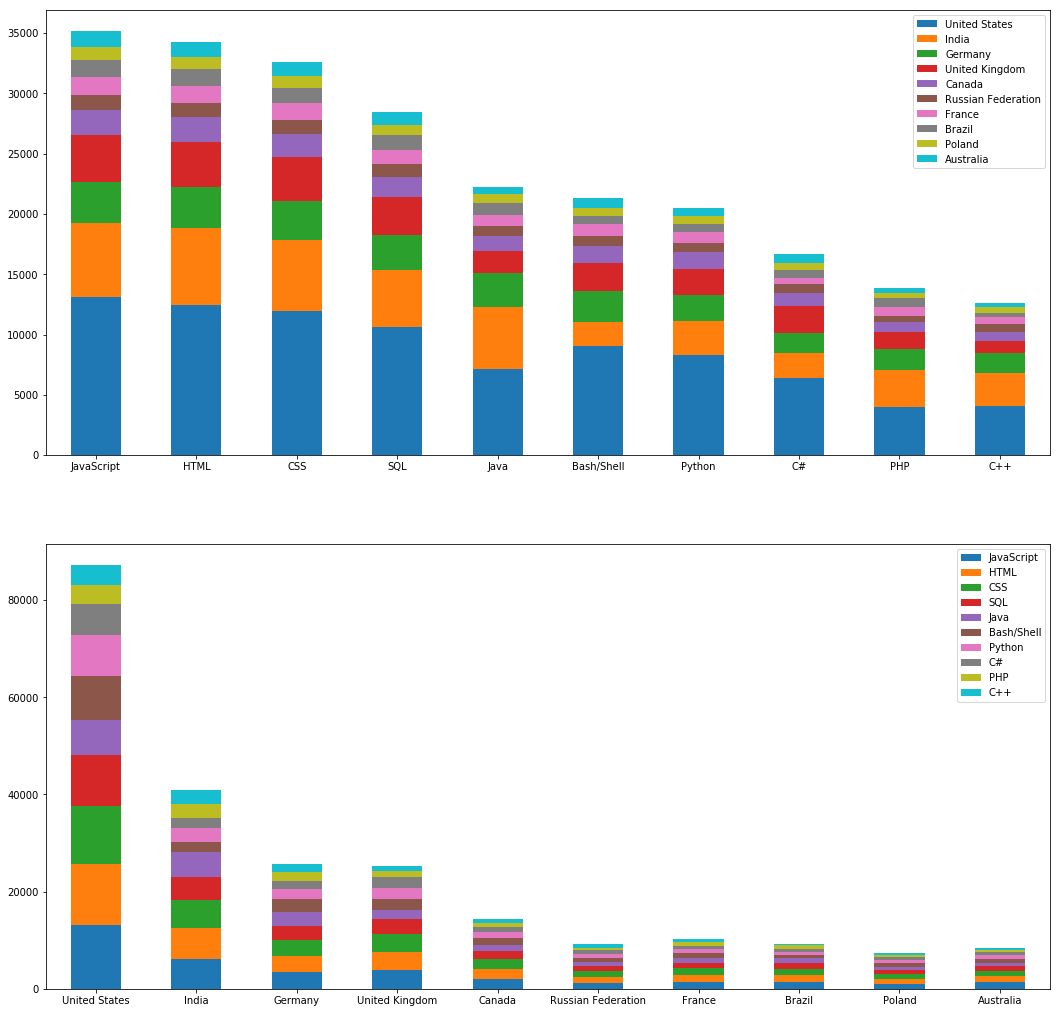

In [272]:
fig, ax_array = plt.subplots(2, 1, figsize=(18,18))
lang_df.plot(kind='bar', ax=ax_array[0], rot=0, stacked=True)
lang_df.T.plot(kind='bar', ax=ax_array[1], rot=0, stacked=True)

In [139]:

ctry_lang_df = sel_df_c[['Country', 'LanguageWorkedWith']]
ctry_lang_df['Country'].value_counts()

india = ctry_lang_df.loc[ctry_lang_df['Country'] == 'India']
# print(india.shape)
# india['LanguageWorkedWith'].dropna(inplace=True)
# print(india.shape)
def foo(i):
    print(i)
    return 'C'

india['LanguageWorkedWith'].apply(foo)

# for i in ctry_lang_df.itertuples():
#     print(i)
# aa = sel_df_c.copy()
# aa['Lang'] = aa['LanguageWorkedWith'].str.split(';', expand=False)
# aa['Lang']

C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Assembly;C;C++;Erlang;Groovy;Java
nan
C;C++;C#;Java;JavaScript;Objective-C;SQL;VB.NET;HTML;CSS
C;Java;Objective-C;Swift;HTML;CSS
C;C++;Java;JavaScript;Objective-C;Swift;HTML;CSS
nan
C;C++;Java;PHP;SQL;HTML;CSS
JavaScript;TypeScript;HTML;CSS
JavaScript;Objective-C;Swift;TypeScript;HTML
C#;JavaScript;SQL;HTML;CSS
C#;SQL;VB.NET;HTML
Java;JavaScript
Assembly;C;C++;C#;Java;JavaScript;Matlab;PHP;R;Scala;SQL;TypeScript;VB.NET;HTML;CSS
Java
Assembly;C#;JavaScript;PHP;HTML;CSS
C#;JavaScript;SQL;VB.NET;Visual Basic 6;HTML;CSS
C#;JavaScript;SQL;HTML;CSS
Assembly;C#;Java
nan
nan
nan
nan
Java;JavaScript;PHP;SQL;HTML;CSS
Go;JavaScript;Python;TypeScript;HTML;CSS;Bash/Shell
Java;JavaScript;Python;TypeScript;Kotlin;HTML;CSS
nan
C#;JavaScript;SQL;TypeScript;HTML;CSS
C;C++;Java;R;SQL;HTML;CSS
C;C++;Java;Matlab;Objective-C;Python;Swift;HTML;CSS
nan
JavaScript;PHP;SQL;HTML;CSS
C;C++;Java;JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell
C;C++;Java;Matlab;Objective-C;PHP;Python;HTML;CSS;Bash/Shell
Java;JavaScri

C;Java;JavaScript;PHP;SQL;HTML;CSS
C;C++;C#;JavaScript;Objective-C;PHP;Swift
C
C;C#;JavaScript;HTML;CSS
Java;JavaScript;PHP;CSS
nan
SQL
C#;JavaScript;SQL;TypeScript;VB.NET;HTML;CSS
C++;Java;Perl;HTML;CSS
nan
C;C++
C
C;C++;Java;JavaScript;SQL;HTML;CSS;Bash/Shell
Assembly;C;C++;JavaScript;PHP;Ruby;HTML;CSS
C;C#;JavaScript;PHP;SQL;VB.NET;HTML;CSS
Java;JavaScript;HTML
C;C++;C#;Java;PHP
nan
nan
CoffeeScript;Java;JavaScript;Kotlin;HTML;CSS;Bash/Shell
C;C#;Go;Java;JavaScript;PHP;Python;Rust;SQL;HTML;CSS;Bash/Shell
C#;Java;JavaScript;SQL;Bash/Shell
C
C;C++;Java;JavaScript;HTML;CSS
Java;Matlab;Python;SQL
C;JavaScript;PHP;HTML;CSS
nan
C;C++;Java;JavaScript;PHP;Python;SQL;Swift;HTML;CSS
C;Java;Matlab;Python
C;C++;Java;JavaScript;Matlab;Python;SQL;Visual Basic 6;HTML;CSS
Assembly;C;C++;Java;JavaScript;PHP;Python;SQL;TypeScript;HTML;CSS;Bash/Shell
C;C++
C;C++;JavaScript;Python
Groovy;Java;JavaScript
Assembly;C;C++;C#;JavaScript;Python;HTML;CSS;Bash/Shell
C;Java;JavaScript;Python
C;Java;JavaScript;P

Python;SQL;Bash/Shell
JavaScript;HTML;CSS
JavaScript
JavaScript
Java;JavaScript;PHP;TypeScript;HTML;CSS
JavaScript;PHP;Ruby;Scala;HTML;CSS
nan
C;Java;SQL
PHP;Python;Ruby;SQL;Visual Basic 6;HTML;CSS;Bash/Shell
nan
Assembly;C;C++;C#;Hack;Java;JavaScript;Matlab;Perl;PHP;Python;R;Ruby;SQL;VB.NET;HTML;CSS;Bash/Shell
JavaScript;Swift;HTML;CSS
nan
JavaScript;PHP;SQL;HTML;CSS
CoffeeScript;Java;JavaScript;PHP;Ruby;SQL;HTML;CSS
JavaScript;SQL;HTML;CSS
C;C++;Python
JavaScript;PHP;HTML;CSS
Assembly;C;Java;JavaScript;Ruby;SQL;HTML;CSS;Bash/Shell
C#;JavaScript;SQL;HTML;CSS
Java;JavaScript;PHP;Ruby;SQL;HTML;CSS
JavaScript;HTML;CSS
Java;SQL;HTML;CSS
C#;JavaScript;SQL;TypeScript;HTML;CSS
JavaScript;PHP;SQL;HTML;CSS
C;Java;JavaScript;SQL;HTML;CSS
C;JavaScript;PHP;SQL;TypeScript;HTML;CSS
C;C++;C#;Matlab;Objective-C;HTML
C;C#;JavaScript;SQL;VB.NET
C#;JavaScript;SQL;HTML;CSS
CoffeeScript;JavaScript;R;Ruby;SQL;Swift;HTML;CSS;Bash/Shell
nan
C#;Java;JavaScript;Python;HTML;CSS
C;Java;JavaScript;SQL;HTML;CSS
Ja

nan
C;C++;SQL;HTML;CSS;Bash/Shell
Objective-C;Swift
nan
nan
Java;Ruby;SQL;Ocaml;HTML;CSS;Bash/Shell
C;C++;Java;Objective-C;PHP;SQL;VB.NET;HTML;CSS
nan
nan
C;Java;JavaScript
nan
JavaScript;PHP;SQL
nan
Assembly;C;C++;Objective-C;PHP;SQL;Swift
nan
nan
JavaScript;Python;SQL
Java;JavaScript;Python;SQL;Bash/Shell
Objective-C;Swift
C;Java;JavaScript;Python;HTML;CSS;Bash/Shell
JavaScript;HTML;CSS
Java;SQL;Bash/Shell
C#;CoffeeScript;JavaScript;SQL;TypeScript;VB.NET;HTML;CSS
C#;SQL;TypeScript;HTML;CSS
nan
Java;JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell
Objective-C;Python;Swift
C#;JavaScript;SQL;TypeScript;HTML;CSS
JavaScript;PHP;HTML;CSS
Java;JavaScript;TypeScript
C;C++;C#;JavaScript;SQL;HTML;CSS;Bash/Shell
JavaScript;PHP;Python;HTML;CSS
C#;Java;SQL;HTML;CSS
JavaScript;PHP;Python;HTML;CSS
C;C++;JavaScript;PHP;TypeScript;HTML;CSS;Bash/Shell
Java
JavaScript;HTML;CSS
C;Java;JavaScript;PHP;SQL;HTML;CSS
nan
Java;PHP;SQL
C;Haskell;JavaScript;Python;R;HTML;CSS;Bash/Shell
nan
JavaScript;PHP;SQL;HTML;

nan
Groovy;Java;JavaScript;SQL;HTML;CSS;Bash/Shell
Java
Python
Java;JavaScript;Ruby;SQL;HTML;CSS
nan
JavaScript;PHP;Python;HTML;CSS
nan
Java;JavaScript;Python
Groovy;Java;JavaScript;Python;Bash/Shell
C;C++;JavaScript;PHP;HTML;CSS
Java;JavaScript;CSS
Java;JavaScript;SQL
nan
Haskell;Julia
C;Matlab;Python
C++;Java;Scala
nan
C#;JavaScript;SQL;TypeScript;HTML;CSS
JavaScript;PHP;SQL;HTML;CSS
nan
Assembly;C;JavaScript;Python;SQL;HTML;CSS
C#;Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS;Bash/Shell
C;C#;Groovy;Java;JavaScript;SQL;VB.NET;HTML;CSS
nan
nan
nan
C;C++;CoffeeScript;Java;JavaScript;HTML;CSS
Assembly;C;C++;Java;JavaScript;PHP;Python;SQL;TypeScript;HTML;CSS;Bash/Shell
nan
nan
nan
C#;CoffeeScript;JavaScript;PHP;Ruby;SQL;VB.NET;HTML;CSS
Java;JavaScript;PHP;TypeScript;HTML;CSS
nan
nan
JavaScript;HTML;CSS
nan
nan
Objective-C;Swift
nan
nan
C#;Go;JavaScript;SQL;TypeScript;HTML;CSS
C#
C;C++;C#;Java;JavaScript;TypeScript;HTML
Assembly;C;C++;JavaScript;Objective-C;PHP;Swift;VB.NET;Visual Basic 6;H

JavaScript;Ruby;Bash/Shell
Java;Swift;Kotlin
JavaScript;Matlab;Python;SQL;HTML;CSS
Java
C#;JavaScript;TypeScript;HTML;CSS;Bash/Shell
C;C++;Lua;Python
JavaScript;HTML;CSS
Objective-C;Swift
nan
C#;JavaScript;TypeScript;HTML;CSS
Java;JavaScript;SQL;TypeScript
nan
Java;JavaScript;Scala;SQL;HTML;CSS;Bash/Shell
C;C++;JavaScript;PHP;SQL;TypeScript;HTML;CSS
nan
Assembly;C;C++;C#;Java;JavaScript;Objective-C;Python;SQL;HTML;CSS
Assembly;C;C++;C#;Java;Objective-C;Python;Swift;Kotlin
Java;JavaScript;PHP;SQL;HTML;CSS;Bash/Shell
nan
Python;HTML
C#;Java;JavaScript;PHP;Python;Ruby;SQL;Swift;HTML;CSS;Bash/Shell
nan
C#;JavaScript;SQL;HTML;CSS
C#;Java;JavaScript;SQL;TypeScript;HTML;CSS
nan
nan
nan
nan
JavaScript;PHP;HTML;CSS
nan
C;Erlang;Java;JavaScript;SQL;HTML;CSS
C;C++;Java;JavaScript;SQL;HTML;CSS
C;JavaScript;PHP;Python;R;SQL;HTML;CSS
nan
nan
nan
nan
JavaScript;PHP;Python;SQL;HTML;CSS
JavaScript;PHP;SQL;TypeScript;VB.NET;HTML;CSS
Java
C#;Python
nan
nan
nan
Java;JavaScript;HTML;CSS
nan
nan
nan
Java
na

C;Java;JavaScript
C#;Java;JavaScript;PHP;Python;SQL;VBA;VB.NET;HTML;CSS;Bash/Shell
JavaScript;PHP;HTML;CSS
Java;JavaScript
JavaScript;PHP;HTML;CSS
nan
nan
C;C++;C#;Java;JavaScript;PHP;SQL;VB.NET;Kotlin;HTML;CSS
C#;HTML;CSS
C++;Haskell;Python;SQL;HTML
C++;C#;JavaScript;Objective-C;Python;SQL;VB.NET;HTML;CSS
Python;Bash/Shell
nan
C#;JavaScript;SQL;TypeScript;HTML;CSS
C;C++;CoffeeScript;Java;JavaScript;PHP;Python;Ruby;SQL;TypeScript;HTML;CSS;Bash/Shell
C;C++;Java;PHP;Python
Java
nan
JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell
nan
C#;JavaScript;SQL;HTML;CSS
Java
JavaScript;Objective-C;SQL;Swift;HTML;CSS
C#;SQL
nan
nan
nan
C;C++;JavaScript;Ruby;SQL;Visual Basic 6;HTML;CSS
Java
nan
Go;Java;JavaScript;HTML;CSS;Bash/Shell
C++;C#;JavaScript;Python;HTML;CSS
C;C++;C#;Java;JavaScript;Objective-C;PHP;SQL;Swift;VB.NET;HTML;CSS
JavaScript;PHP;HTML;CSS
Assembly;C;C++;C#;Java;JavaScript;SQL;TypeScript;VBA;VB.NET;HTML;CSS
nan
PHP;SQL;HTML;CSS
nan
JavaScript;TypeScript;HTML;CSS
nan
Assembly;C;JavaScrip

C++;Java;JavaScript;PHP;TypeScript;HTML;CSS
C;C++;JavaScript;Python;TypeScript;HTML;CSS
Java;JavaScript;PHP;HTML;CSS
JavaScript;SQL;Visual Basic 6;HTML;CSS
Java;JavaScript;TypeScript;HTML;CSS
nan
nan
Java
Java;Python
C#;Java;HTML;CSS
Java;Swift;Kotlin
Java;JavaScript;SQL;TypeScript;HTML;CSS
JavaScript;PHP;Python;HTML;CSS;Bash/Shell
C;C++;C#;Hack;JavaScript;Perl;PHP;Python;SQL;HTML;CSS
C;C++;Java;JavaScript;Perl;PHP;SQL;HTML;CSS
C;C++;Java;JavaScript;Python
Assembly;C;C++;C#;Java;JavaScript;Perl;PHP;Python;Rust;SQL;HTML;CSS
Java;Swift
Java;JavaScript;Python;SQL;HTML;CSS;Bash/Shell
C;Java;Objective-C;Swift
C#
C#;JavaScript;SQL;TypeScript;HTML;CSS
C;C++;Java;SQL;HTML
Java;JavaScript;HTML;CSS
C;C++;C#;JavaScript;SQL;HTML
C;C++;C#;JavaScript;PHP;SQL;VB.NET;Visual Basic 6;Cobol
Go;Java;Scala;SQL;Bash/Shell
nan
C#;JavaScript;SQL;HTML;CSS
JavaScript;PHP;SQL;TypeScript;HTML;CSS
Java;JavaScript;SQL;HTML;CSS
nan
nan
C;Java;JavaScript;Kotlin
Java;JavaScript
JavaScript;PHP;SQL;HTML;CSS
Java;JavaScr

Python;HTML;CSS
nan
C;C++;Java;Python;Ruby;HTML;CSS
nan
C;Java;JavaScript;SQL;Swift;HTML;CSS;Bash/Shell
JavaScript;PHP;SQL;TypeScript;HTML;CSS
C;JavaScript;Objective-C;Python;Swift
nan
C;C++;Java;JavaScript;Visual Basic 6;HTML;CSS
C++;Java;JavaScript;HTML;CSS
Java;JavaScript;HTML;CSS
C;C++;C#
nan
Clojure;Go;JavaScript;TypeScript
JavaScript;Python;R;HTML;CSS
nan
C;JavaScript;Python;HTML;CSS
JavaScript;PHP;HTML;CSS
Java;JavaScript;PHP;SQL;HTML;CSS
Java;PHP;SQL;HTML;CSS
C#;SQL
Assembly;C;C++;Java;JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell
Assembly;C;C++;C#;Java;JavaScript
C;JavaScript;PHP;SQL
JavaScript
Java;Python;SQL;HTML;CSS
JavaScript;PHP;SQL;TypeScript;HTML;CSS
C;Java;JavaScript;HTML;CSS
JavaScript;Python;HTML;CSS
C;Java;JavaScript;PHP;HTML;CSS
nan
C#;JavaScript;SQL;TypeScript;HTML;CSS
nan
Python;SQL
nan
Java;JavaScript;Scala;SQL;HTML;CSS
C;C++;Java;Objective-C;Python;Bash/Shell
Assembly;C;Java;JavaScript;Python;SQL;HTML;CSS
JavaScript;PHP;SQL;Cobol;HTML;CSS
nan
nan
C#;SQL;HTML;CS

nan
C;C++;C#;CoffeeScript;Java;JavaScript;Matlab;PHP;Python;Ruby;SQL;Visual Basic 6;HTML;CSS;Bash/Shell
Assembly;C;C++;C#;Java;Matlab;Python;Ruby;HTML;CSS;Bash/Shell
Java;Matlab
nan
C++;C#;JavaScript;Python;SQL;TypeScript
nan
nan
nan
JavaScript;Python
C;Java;SQL;HTML;CSS
Go;Java;Bash/Shell
C++;Java;PHP
C#;JavaScript;SQL;TypeScript
C;Java;JavaScript;Perl;PHP;Python;SQL;Visual Basic 6;HTML;CSS;Bash/Shell
C;C++;C#;Java;JavaScript;PHP;Python;SQL;Kotlin;HTML;CSS
PHP;HTML
Java;JavaScript;PHP;HTML;CSS
Java;JavaScript;PHP;SQL;HTML;CSS
nan
C++;Java;Kotlin
Java;SQL;HTML;CSS
nan
JavaScript;TypeScript;HTML;CSS;Bash/Shell
Java;JavaScript;Objective-C;Swift;HTML;CSS
Java;JavaScript;HTML;CSS;Bash/Shell
nan
Java;Python;HTML
Assembly;C;C++;Java;PHP;Python;HTML;CSS
C;C++;C#;JavaScript;PHP;SQL;VBA;VB.NET;Visual Basic 6;HTML;CSS
C;C++;C#;Java;PHP;Cobol;HTML;CSS;Bash/Shell
C#;JavaScript;SQL;VB.NET;HTML
JavaScript;TypeScript;HTML;CSS
Java;JavaScript;Python;Scala;SQL;HTML;CSS;Bash/Shell
nan
C;C++;Java;Python


nan
Java;JavaScript;PHP;SQL;HTML;CSS
Java
C;C++;Java;Objective-C;SQL;Swift
JavaScript;PHP;Python;SQL;HTML;CSS
JavaScript;PHP
Java;Kotlin
C;C++;Groovy;Java;JavaScript;HTML;CSS
nan
Python
nan
C;Java;JavaScript;Python;SQL;TypeScript;HTML;CSS
Java;Python;Kotlin
C;Java;Matlab;Kotlin;HTML;CSS
Assembly;C;Java;Ruby;HTML;CSS
C;C++;JavaScript;PHP;Python;SQL;HTML;CSS
C;C#;Java;JavaScript;Matlab;PHP;Python;SQL;Swift;Kotlin;HTML
C;C++;C#;Python;SQL;HTML;Bash/Shell
Java;SQL;HTML
Java;JavaScript
Assembly;C;C++;Java;PHP;Python;SQL;HTML;CSS
JavaScript;TypeScript
C#
nan
nan
Python;Swift
Java
Java;JavaScript;HTML;CSS
C;C++;Java;JavaScript;PHP;SQL;HTML;CSS
C#;JavaScript;SQL;HTML;CSS
JavaScript;Python;SQL;HTML;CSS;Bash/Shell
Assembly;Python;SQL;VBA
C;Java;JavaScript;Python;SQL;HTML;CSS
nan
C;C++;Java;JavaScript;SQL;HTML;CSS
C++;C#;Erlang;Go;JavaScript;Python;SQL;HTML;CSS
Objective-C;Swift
Java;Objective-C;Swift;Bash/Shell
Java
nan
nan
nan
C#;Groovy;JavaScript;Perl;Python;TypeScript;HTML;Bash/Shell
Java;Jav

Java;JavaScript;SQL;HTML;CSS
Java
nan
nan
Java
C++;C#
Assembly;C;C++;Python;SQL;HTML;CSS;Bash/Shell
nan
nan
C;C++;Java;Objective-C
JavaScript;TypeScript;HTML;CSS
C;Java
C#;JavaScript;Python;SQL;HTML;CSS;Bash/Shell
Go;Python;SQL;Bash/Shell
nan
Java;JavaScript;PHP;HTML;CSS
Java;JavaScript;Objective-C;Swift
C++;Java;JavaScript;PHP;Ruby;HTML;CSS
Java;SQL
Java;JavaScript;Python;Ruby;Bash/Shell
Java
nan
Python;HTML;CSS;Bash/Shell
PHP;HTML;CSS
nan
nan
nan
Python
C++;Haskell;Java;Python;Rust;TypeScript;HTML;CSS
JavaScript;SQL;HTML;CSS
C++;C#;JavaScript;Python;TypeScript;VB.NET
C#;Python;Bash/Shell
C#;Java;JavaScript;Python;SQL;HTML;CSS
Assembly;C;C++;Java;JavaScript;Matlab;PHP;Python;SQL;HTML;CSS;Bash/Shell
Python;Swift;Bash/Shell
C;C++
C;C++;PHP;Python;SQL;HTML;CSS
Java;JavaScript
JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell
Python
nan
JavaScript;PHP;SQL;HTML;CSS;Bash/Shell
Go;Java;JavaScript;Matlab;Objective-C;PHP;Python;SQL;TypeScript;HTML;CSS
Assembly;C;JavaScript;PHP;SQL;HTML;CSS
C++;Jav

C#;JavaScript;SQL;TypeScript
C;C++;HTML
Java;Visual Basic 6;HTML
nan
nan
C#;JavaScript;SQL;CSS;Bash/Shell
nan
C;Java;Objective-C
C;C++;Java;Python;HTML
nan
PHP
nan
C;C++;JavaScript;HTML;CSS
nan
nan
Java
nan
C;C++;Java;JavaScript;PHP;Python;R;HTML;CSS;Bash/Shell
C;C++;JavaScript;Python;HTML;CSS
C;C++;Java;JavaScript;Perl;PHP;Python;TypeScript;HTML;CSS
Java
JavaScript;PHP;SQL;HTML;CSS
C;C++;Java;SQL;HTML;CSS
Java;JavaScript;SQL;HTML;CSS
JavaScript;Matlab;HTML;CSS
CoffeeScript;JavaScript;Ruby
nan
Assembly;Java;Scala;SQL
C
C
JavaScript;TypeScript;HTML;CSS
Java;JavaScript;SQL;TypeScript;HTML;CSS
Assembly
nan
Objective-C
nan
C;C++;Java;JavaScript;SQL;HTML;CSS
Java;SQL;Kotlin
nan
C;C++;JavaScript;Objective-C;PHP;SQL;VBA;VB.NET;Visual Basic 6;Cobol;CSS
C#;JavaScript;SQL;HTML;CSS
nan
CoffeeScript;JavaScript;HTML;CSS
nan
nan
Java
JavaScript;Perl;PHP;Python;SQL;TypeScript;HTML;CSS;Bash/Shell
JavaScript;PHP;Python;SQL;HTML;CSS
JavaScript;PHP;TypeScript
C#;Java;JavaScript;SQL;VB.NET;HTML;CSS
C++;Py

60474    C
92848    C
61244    C
41557    C
7528     C
92721    C
41290    C
62376    C
61074    C
7537     C
41564    C
42685    C
61002    C
61237    C
6870     C
60473    C
42784    C
6869     C
92845    C
93389    C
92722    C
93898    C
43361    C
43359    C
41560    C
93394    C
42725    C
7703     C
7547     C
62150    C
        ..
18657    C
33702    C
13396    C
69010    C
21232    C
13394    C
83013    C
33809    C
87851    C
33799    C
33811    C
87746    C
87836    C
23451    C
13421    C
13419    C
68999    C
68919    C
87832    C
87853    C
83224    C
68915    C
33818    C
80851    C
33714    C
13414    C
33713    C
33710    C
21218    C
87825    C
Name: LanguageWorkedWith, Length: 13721, dtype: object